# Report - Relationship between Bitcoin and S&P 500 Prices
**Emin Mammadov** <br>

## Preparation

### Install Dependencies

In [1]:
%pip install sqlalchemy
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgr

### Import Modules

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine

### Load Data

In [4]:
# If database doesn't exist, run datapipeline to create it

# Establish connection to the SQLite database
engine = create_engine('sqlite:///../data/bitcoin_data.sqlite')

# Load Bitcoin data into a DataFrame
bitcoin_df = pd.read_sql_table('bitcoin_prices', engine, index_col='Date')

# Establish connection to the S&P 500 SQLite database
engine_sp500 = create_engine('sqlite:///../data/sp500_data.sqlite')

# Load S&P 500 data into a DataFrame
sp500_df = pd.read_sql_table('sp500_prices', engine_sp500, index_col='Date')

## Introduction

### Motivation
In an era where digital currencies are rapidly gaining prominence, Bitcoin stands out as a potential game-changer in the financial sector. Its correlation with the S&P 500, a principal indicator of U.S. stock market performance, holds significant implications for diverse financial strategies. Investigating this correlation is pivotal for several reasons:

1. Portfolio Diversification: If Bitcoin shows low or negative correlation with the S&P 500, it could serve as a valuable asset for diversifying investment portfolios, offering a hedge against market downturns in traditional stocks.

2. Risk Management: Understanding the nature of Bitcoin's relationship with the S&P 500 helps in assessing its volatility and risk profile, which is crucial for investors in making informed decisions.

3. Market Sentiment Indicator: Analyzing how Bitcoin prices move in relation to the S&P 500 can reveal insights into investor sentiment and broader economic trends, especially during periods of financial uncertainty.

This project aims to uncover these aspects, offering valuable insights for investors, financial analysts, and policymakers in navigating the complex interplay between emerging digital assets and traditional financial markets.

## Methods

### Data Sources

For this analysis, two primary data sources were utilized:

1. Bitcoin Data: The Bitcoin price data was sourced from Kaggle's 'cryptocurrencypricehistory' dataset. This dataset was chosen for its comprehensive historical price records of Bitcoin, making it ideal for a detailed time series analysis.
    * Link: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
2. S&P 500 Data: The S&P 500 data was obtained from the Federal Reserve Economic Data (FRED) website. This source was selected for its reliability and the accurate representation of the U.S. stock market trends over time.
    * Link: https://fred.stlouisfed.org/series/SP500

These datasets were chosen for their relevance and potential to provide insights into the interaction between digital and traditional financial markets.

### Data Pipeline Construction

The data pipeline, developed in Python, entailed several key steps:

1. Kaggle API Integration: Utilized the Kaggle API to download the Bitcoin dataset. This approach ensured an efficient and reproducible method for data acquisition.

2. External Data Download: For the S&P 500 data, a direct download from the FRED website was implemented using the 'requests' library. This method was employed due to the absence of S&P 500 data on Kaggle.

3. Data Loading and Processing: Both datasets were loaded into Pandas DataFrames for preprocessing. This included renaming columns for consistency, converting date columns to Python datetime objects for better handling, and addressing missing values.

    * S&P 500 Data Processing: The 'Close' price was extracted, and missing values were filled using forward-fill to maintain continuity in the data.

    * Bitcoin Data Processing: Extraneous columns were dropped, focusing on essential price and market cap information.

4. Data Alignment: The datasets were aligned based on their date ranges to ensure synchronization in the analysis. This step was crucial in preparing for a meaningful correlation analysis.

5. SQLite Database Storage: Processed data was then saved into SQLite databases for persistent storage and easy retrieval for analysis.

### Challenges Encountered

1. Data Consistency and Alignment: One of the primary challenges was ensuring that the date ranges and formats were consistent between the Bitcoin and S&P 500 datasets. Aligning these datasets was essential for accurate comparative analysis.
2. Handling Missing Data: Dealing with missing or incomplete data, especially in the S&P 500 dataset, required careful consideration to maintain data integrity without introducing biases.
3. Kaggle API Integration: Integrating with the Kaggle API presented its own set of challenges, including handling API authentication, managing data download and extraction, and ensuring data integrity post-download.

### Tools and Technologies
* Python Libraries: The project extensively used Python libraries, including pandas for data manipulation, numpy for numerical calculations, and matplotlib and seaborn for data visualization.
* SQLite for Data Storage: SQLite databases were used for storing the processed data, providing a lightweight and efficient means of handling large datasets.

## Results

### Bitcoin Data Overview

In [5]:
# Descriptive Statistics for Bitcoin Data
bitcoin_stats = bitcoin_df.describe()
print("Bitcoin Data Statistics:")
print(bitcoin_stats)

Bitcoin Data Statistics:
               SNo          High           Low          Open         Close  \
count  2771.000000   2771.000000   2771.000000   2771.000000   2771.000000   
mean   1606.000000   7424.536734   6986.456521   7216.888621   7228.562194   
std     800.063123  11936.490381  11140.436034  11571.727105  11582.024690   
min     221.000000    211.731003    171.509995    176.897003    178.102997   
25%     913.500000    512.787994    485.345490    500.900009    499.316498   
50%    1606.000000   3685.305600   3585.060000   3631.170193   3631.040039   
75%    2298.500000   9113.187824   8696.580334   8868.188966   8874.645214   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.771000e+03  2.771000e+03  
mean   1.177223e+10  1.302897e+11  
std    1.936318e+10  2.163922e+11  
min    0.000000e+00  2.444379e+09  
25%    4.683815e+07  6.957984e+09  
50%    1.976040e+09  6.306514e+10  
75%    1.748935e+10 

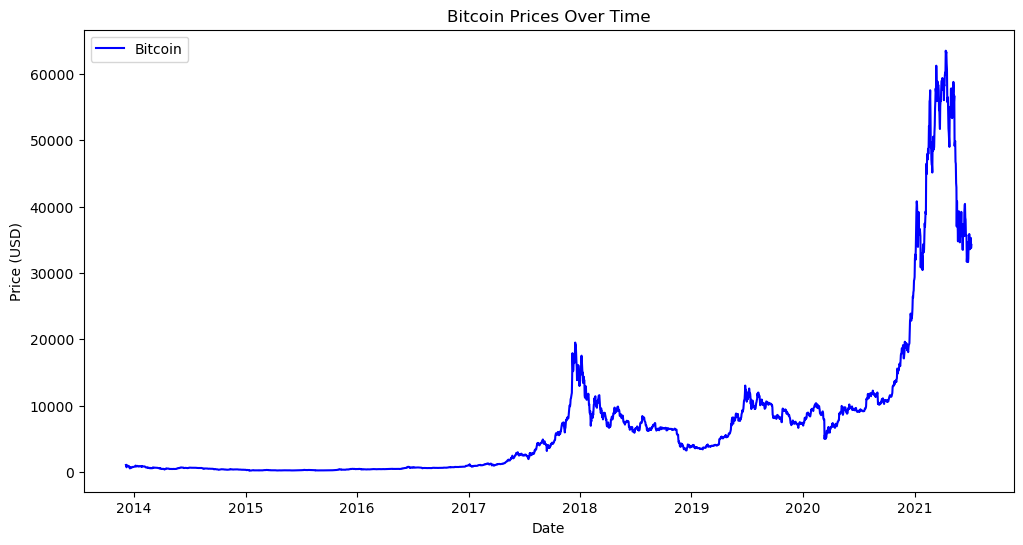

In [6]:
# Price Trend Visualization for Bitcoin Data
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin', color='blue')
plt.title('Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### S&P 500 Data Overview

In [7]:
# Descriptive Statistics
sp500_stats = sp500_df.describe()
print("SP500 Data Statistics:")
print(sp500_stats)

SP500 Data Statistics:
             price
count  1979.000000
mean   2585.112092
std     607.266982
min    1741.890000
25%    2076.925000
50%    2476.550000
75%    2909.300000
max    4352.340000


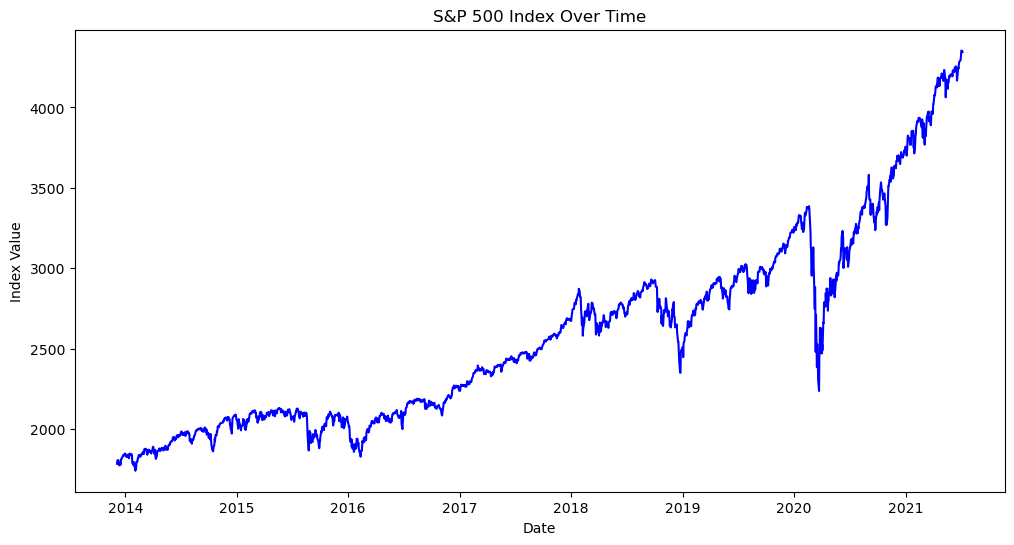

In [8]:
# Price Trend Visualization for SP500 Data
plt.figure(figsize=(12, 6))
plt.plot(sp500_df.index, sp500_df['price'], color='blue')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

### Combined Data Visualization

In [9]:
# Merging the datasets on the date column
combined_df = pd.merge(bitcoin_df.reset_index(), sp500_df.reset_index(), on='Date', how='inner')

In [11]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Normalizing Bitcoin prices
combined_df['Normalized_Bitcoin'] = scaler.fit_transform(combined_df[['Close']])

# Normalizing S&P 500 prices
combined_df['Normalized_SP500'] = scaler.fit_transform(combined_df[['price']])

/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/eminmammadov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name'

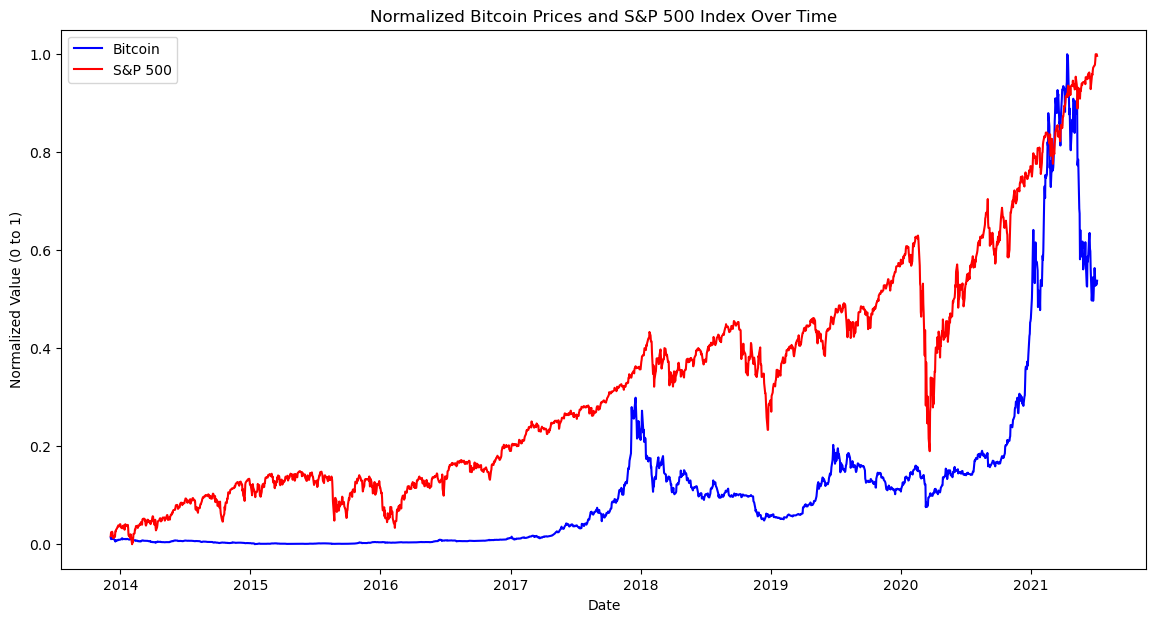

In [12]:
plt.figure(figsize=(14, 7))

# Plotting the normalized Bitcoin prices
plt.plot(combined_df['Date'], combined_df['Normalized_Bitcoin'], label='Bitcoin', color='blue')

# Plotting the normalized S&P 500 prices
plt.plot(combined_df['Date'], combined_df['Normalized_SP500'], label='S&P 500', color='red')

plt.title('Normalized Bitcoin Prices and S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0 to 1)')
plt.legend()
plt.show()

### Trend and Seasonality Decomposition

In [13]:
# Decompose Bitcoin Prices
btc_decompose = seasonal_decompose(combined_df['Normalized_Bitcoin'], model='additive', period=30)
btc_trend = btc_decompose.trend
btc_seasonal = btc_decompose.seasonal
btc_residual = btc_decompose.resid

# Decompose S&P 500 Prices
sp500_decompose = seasonal_decompose(combined_df['Normalized_SP500'], model='additive', period=30)
sp500_trend = sp500_decompose.trend
sp500_seasonal = sp500_decompose.seasonal
sp500_residual = sp500_decompose.resid

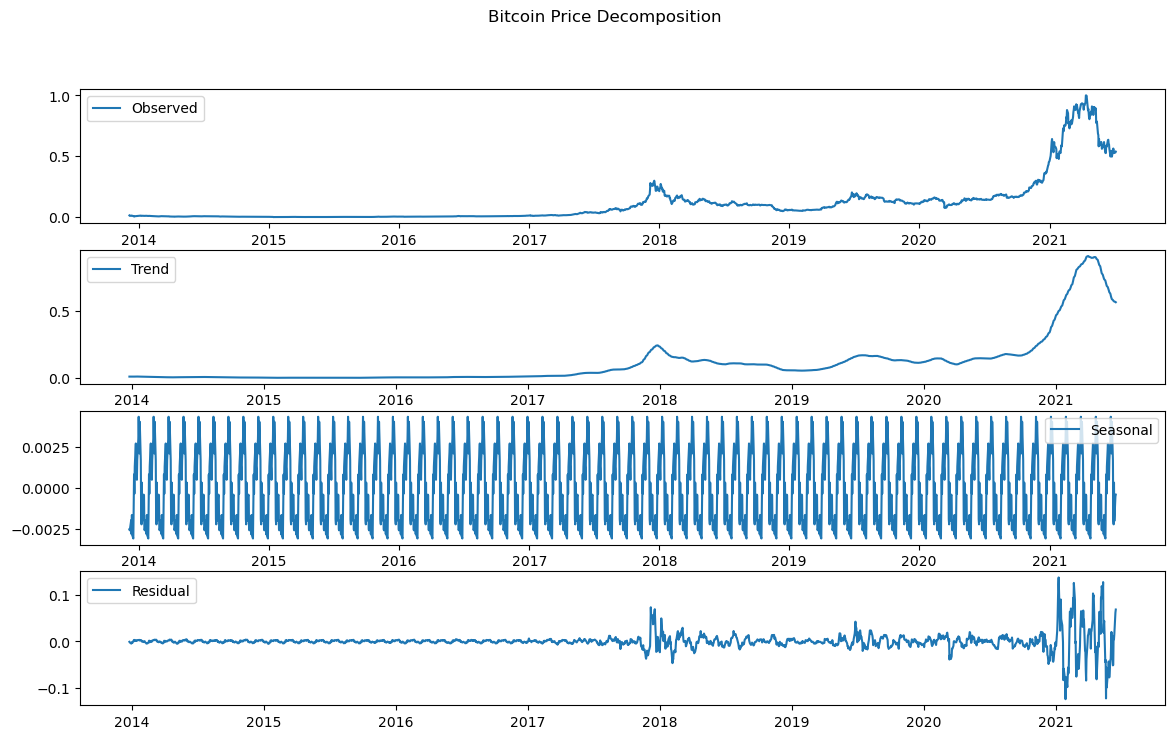

In [14]:
# Plotting the Decomposition for Bitcoin
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(combined_df['Date'], btc_decompose.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(combined_df['Date'], btc_trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(combined_df['Date'], btc_seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(combined_df['Date'], btc_residual, label='Residual')
plt.legend()
plt.suptitle('Bitcoin Price Decomposition')
plt.show()

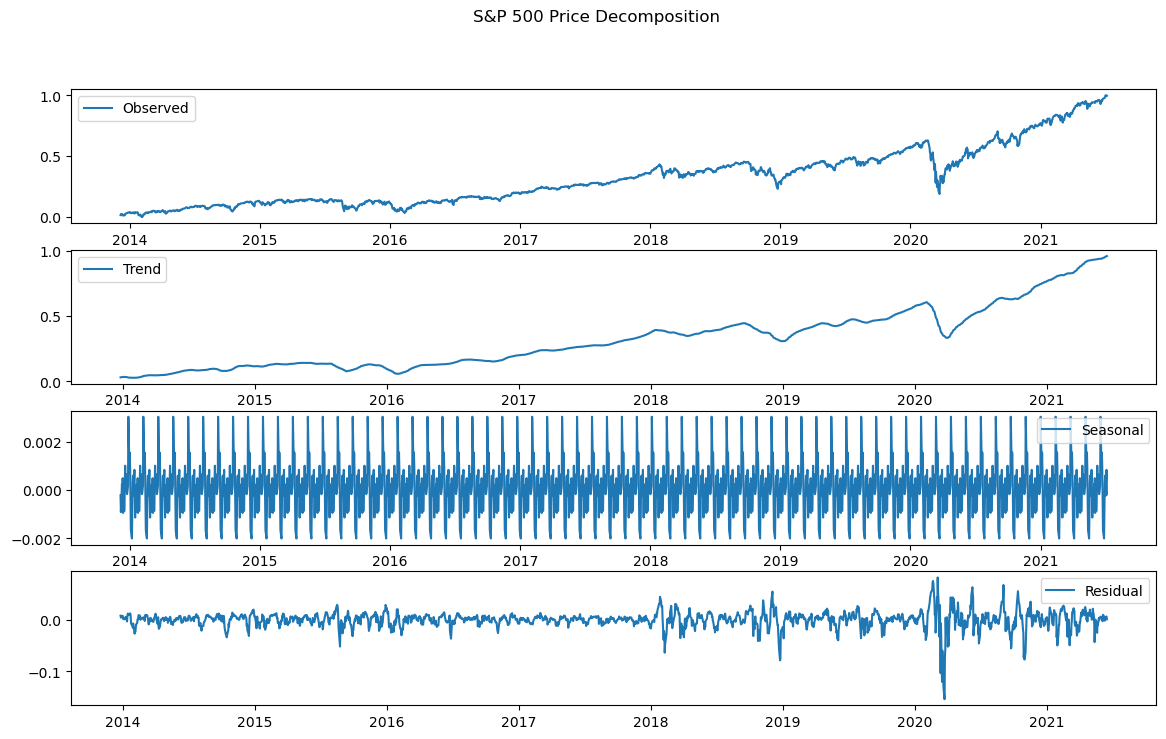

In [15]:
# Plotting the Decomposition for S&P 500
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(combined_df['Date'], sp500_decompose.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(combined_df['Date'], sp500_trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(combined_df['Date'], sp500_seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(combined_df['Date'], sp500_residual, label='Residual')
plt.legend()
plt.suptitle('S&P 500 Price Decomposition')
plt.show()

### Correlation Analysis

In [16]:
# Correlation of Normalized Data
overall_corr = combined_df['Normalized_Bitcoin'].corr(combined_df['Normalized_SP500'])
print(f"Overall Correlation Coefficient: {overall_corr}")

# Correlation of Residuals
residual_corr = btc_residual.corr(sp500_residual)
print(f"Residual Correlation Coefficient: {residual_corr}")

Overall Correlation Coefficient: 0.8403059320026367
Residual Correlation Coefficient: 0.1775638980869279


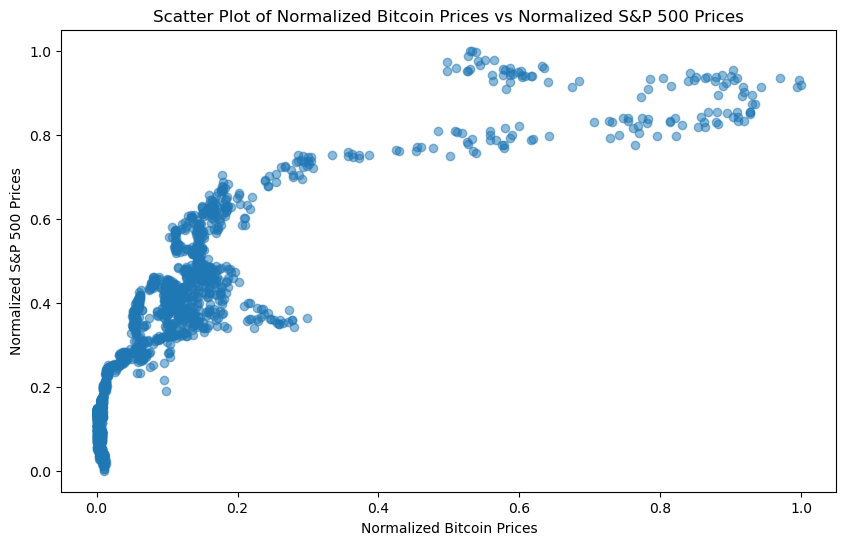

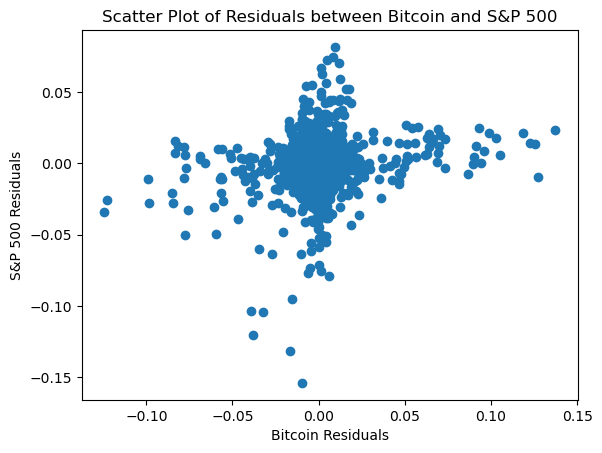

In [18]:
# Scatter Plot for Normalized data
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Normalized_Bitcoin'], combined_df['Normalized_SP500'], alpha=0.5)
plt.title('Scatter Plot of Normalized Bitcoin Prices vs Normalized S&P 500 Prices')
plt.xlabel('Normalized Bitcoin Prices')
plt.ylabel('Normalized S&P 500 Prices')
plt.show()

# Scatter Plot for Residuals
plt.scatter(btc_residual, sp500_residual)
plt.title('Scatter Plot of Residuals between Bitcoin and S&P 500')
plt.xlabel('Bitcoin Residuals')
plt.ylabel('S&P 500 Residuals')
plt.show()

## Conclusion

### Interpretation of Results

1. Overall Correlation:
    * The scatter plot of the normalized data indicated a strong overall correlation between Bitcoin and S&P 500 prices. This suggests that, on a surface level, movements in Bitcoin prices have a significant relationship with movements in the S&P 500 index.

2. Residual Correlation:
    * The scatter plot for residuals revealed a much weaker correlation. This indicates that once the broader trends and seasonal effects are removed, the day-to-day fluctuations of Bitcoin prices are less aligned with those of the S&P 500. This finding is crucial as it suggests that Bitcoin retains unique characteristics that are not entirely influenced by traditional market movements.

3. Implications for Investors and Markets:
    * The analysis implies that Bitcoin might not provide as strong a diversification benefit in a portfolio as one might assume from just observing the overall correlation. However, its lower residual correlation with the S&P 500 suggests that it could still offer some degree of diversification against short-term market trends and movements.

### Limitations

1. Historical Data: The analysis is based solely on historical data, which may not necessarily predict future trends or patterns.

2. External Factors: The study does not account for external factors such as regulatory changes, technological advancements, or macroeconomic variables, which can significantly impact financial markets.

3. Data Scope: The focus on only Bitcoin and the S&P 500 may overlook the broader dynamics of the cryptocurrency market and its interaction with other financial assets.

### Outlook to Future Work

1. Broader Market Analysis: Future studies could include a wider range of cryptocurrencies and compare them with different stock indices or other asset classes to gain a more comprehensive understanding of the market dynamics.

2. Incorporation of External Variables: Incorporating macroeconomic indicators, market sentiment analysis, or regulatory changes could provide deeper insights into the factors driving the correlation between these two markets.

3. Predictive Modeling: Building predictive models using machine learning techniques could help in forecasting future trends based on the observed correlation and market data.